<a href="https://colab.research.google.com/github/Speckky/Stock_Prediction_using_LSTM/blob/main/Stock_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*IMPORTING THE LIBRARIES*

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


*READING THE DATASET*

In [2]:

df=pd.read_csv("WIPRO.csv")


*EXTRACTING "CLOSE" COLUMNS*

In [3]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

*SCALING OF DATA*

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

*CREATING TRAINING DATASET*

In [5]:

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []


*REQUIRED FORMAT FOR LSTM(LONG SHORT-TERM MEMORY)*

In [6]:

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

In [7]:

x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


*BUILDING MODEL*

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

*TRAINING THE MODEL*

In [11]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
4185/4185 [==============================] - 142s 33ms/step - loss: 2.5535e-04
Epoch 2/5
4185/4185 [==============================] - 134s 32ms/step - loss: 1.3698e-04
Epoch 3/5
4185/4185 [==============================] - 134s 32ms/step - loss: 9.5046e-05
Epoch 4/5
4185/4185 [==============================] - 135s 32ms/step - loss: 8.8501e-05
Epoch 5/5
4185/4185 [==============================] - 134s 32ms/step - loss: 7.2019e-05


*CREATING TESTING DATASET*

In [12]:

test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])


In [13]:
x_test = np.array(x_test)


In [14]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


34/34 [==============================] - 1s 18ms/step


*CALCULATING RMSE(ROOT MEAN SQUARE ERROR)*

In [16]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 56.536759822173124


*VISUALISING THE DATA*

<ipython-input-17-9b898e984bdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


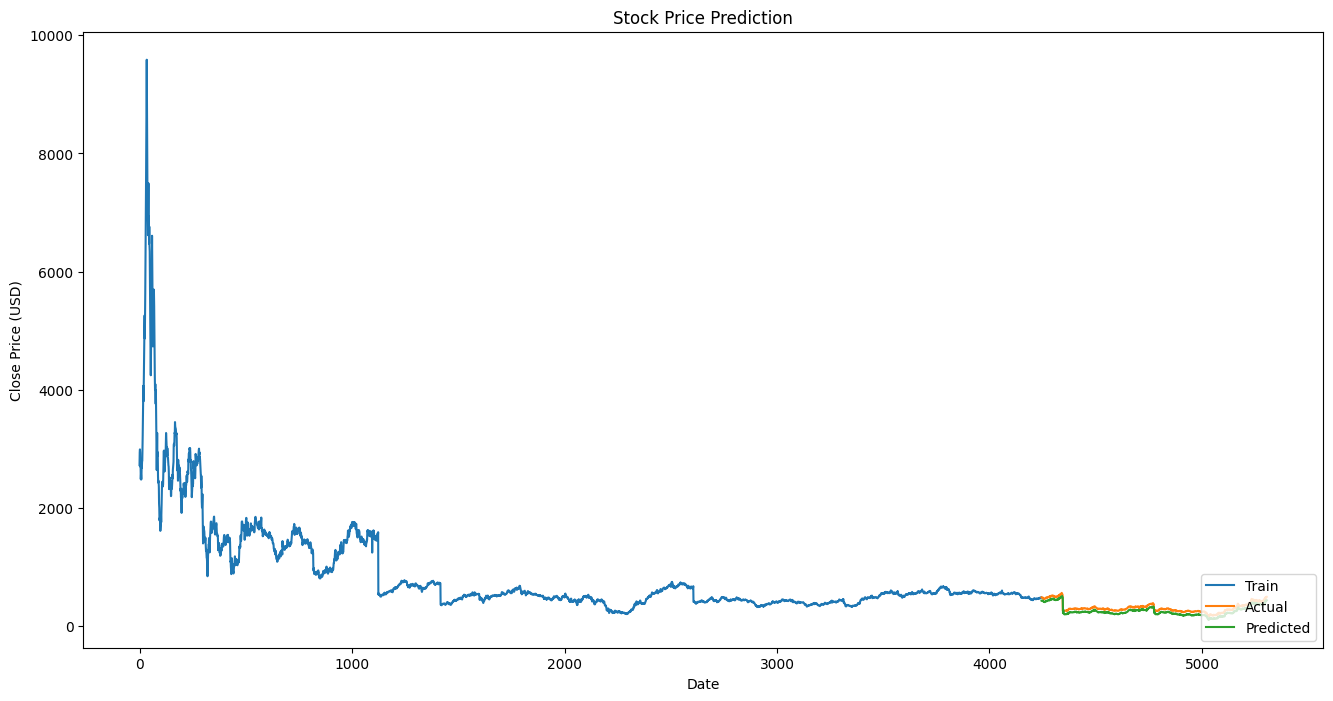

In [17]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()

*THE END.*